In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import csv

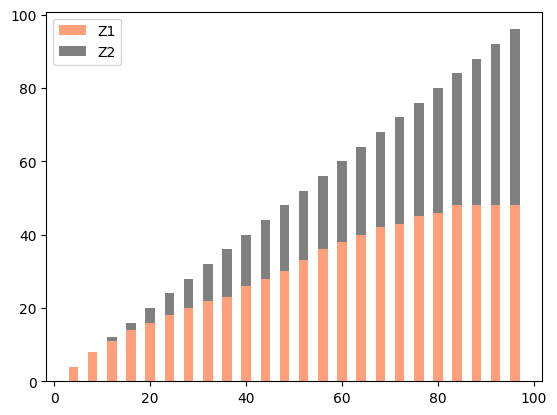

In [12]:
### Distributed
### Settings
z_dim = 96
beta_rec = 0.0 # 98304.0 10000.0
batch_size = 64
beta_kl = 0.1 # 1.0 25.0
vae_model = "ResBasedVAE" # "SVAE" or "CNNBasedVAE"
weight_cross_penalty = 0.1
beta_task = 0.1 # task aware
VAEepoch = 449
dataset = 'airbus' # 'PickAndPlace' or 'gym_fetch'
seed = 2
lr = 1e-4
model_type = "AE"
width = 80
height = 112

### load csv file
mAP = []
z_list = []
rep_dims = [[], [], []]
z_list.append([])
mAP.append([])
file_name = f'{dataset}_{z_dim}_taskaware_{model_type}_{vae_model}{width}x{height}_kl{beta_kl}_rec{beta_rec}_task{beta_task}_bs{batch_size}_cov{weight_cross_penalty}_lr{lr}_seed{seed}-ep{VAEepoch}'
csv_name = file_name + '.csv'

with open('../csv_data/' + csv_name, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0] == 'dpca_dim':
            continue
        else:
            z_list[-1].append(int(row[0]))
            mAP[-1].append(float(row[4]))
            rep_dims[0].append(int(row[1]))
            rep_dims[1].append(int(row[2]))
            rep_dims[2].append(int(row[3]))

rep_dims = np.array(rep_dims)

### stacked bar plot
colors = ['blue', 'orange', 'green']
plt.bar(z_list[0], rep_dims[0], width=2, color='lightsalmon', label='Z1')
plt.bar(z_list[0], rep_dims[1], width=2, color='grey', label='Z2', bottom=rep_dims[0])
plt.legend(loc="upper left")
# plt.title('Importance of representations (task-aware)')
# plt.legend(bbox_to_anchor=(0.47, 0.43), loc='upper left', borderaxespad=0)
plt.savefig('../plots/airbus/z_importance.png', bbox_inches='tight', dpi=300)
plt.show()


In [13]:
### Joint
z_dim = 96
beta_rec = 0.0
batch_size = 64
beta_kl = 0.0 # 1.0 25.0
vae_model = "JointResBasedVAE"
weight_cross_penalty = 0.0
beta_task = 0.1 # task aware
VAEepoch = 399
seed = 2
lr = 1e-4
model_type = "AE"

### Joint 
rep_dims = [[], [], []]
z_list.append([])
mAP.append([])
file_name = f'{dataset}_{z_dim}_taskaware_{model_type}_{vae_model}{width}x{height}_kl{beta_kl}_rec{beta_rec}_task{beta_task}_bs{batch_size}_cov{weight_cross_penalty}_lr{lr}_seed{seed}-ep{VAEepoch}'
csv_name = file_name + '.csv'

with open('../csv_data/' + csv_name, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0] == 'dpca_dim':
            continue
        else:
            z_list[-1].append(int(row[0]))
            mAP[-1].append(float(row[4]))
            rep_dims[0].append(int(row[1]))
            rep_dims[1].append(int(row[2]))
            rep_dims[2].append(int(row[3]))

rep_dims = np.array(rep_dims)

In [14]:
# # ###  Smaller representation
# z_dim = 24
# beta_rec = 0.0
# batch_size = 64
# beta_kl = 0.0 # 1.0 25.0
# vae_model = "ResBasedVAE"
# weight_cross_penalty = 0.0
# beta_task = 0.1 # task aware
# VAEepoch = 399
# seed = 2
# lr = 1e-4
# model_type = "AE"

# rep_dims = [[], [], []]
# z_list.append([])
# mAP.append([])
# file_name = f'{dataset}_{z_dim}_taskaware_{model_type}_{vae_model}{width}x{height}_kl{beta_kl}_rec{beta_rec}_task{beta_task}_bs{batch_size}_cov{weight_cross_penalty}_lr{lr}_seed{seed}-ep{VAEepoch}'
# csv_name = file_name + '.csv'

# with open('../csv_data/' + csv_name, 'r') as f:
#     reader = csv.reader(f)
#     for row in reader:
#         if row[0] == 'dpca_dim':
#             continue
#         else:
#             z_list[-1].append(int(row[0]))
#             mAP[-1].append(float(row[4]))
#             rep_dims[0].append(int(row[1]))
#             rep_dims[1].append(int(row[2]))
#             rep_dims[2].append(int(row[3]))

# rep_dims = np.array(rep_dims)

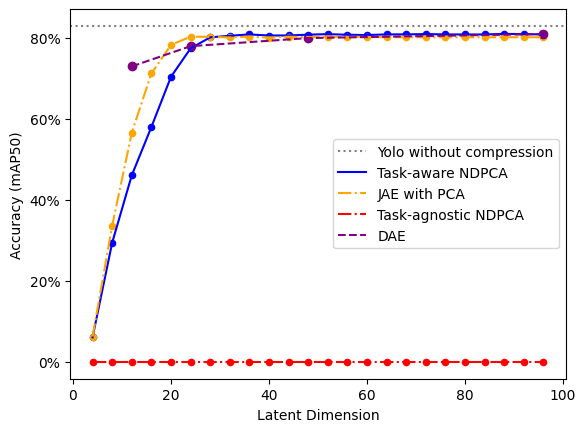

In [15]:
plt.axhline(y = 0.83, color = 'gray', linestyle = ':', label='Yolo without compression')

label = ['Task-aware NDPCA', 'JAE with PCA']# , 'Task-aware (latent dim 24)'] # 'Joint Task-aware Coding']
color_list = ['b', 'orange', 'g', 'aqua']
line_style = ['-', '-.', '--', '-']
### plot
for l, z, sr, c, ls in zip(label, z_list, mAP, color_list, line_style):
    plt.plot(z[::1], sr[::1], c=c, label=l, linestyle=ls)
    plt.scatter(z[::1], sr[::1], c=c, s=20)

### fully reconstruction
plt.plot(np.arange(4, 97, 4), 0 * np.arange(4, 97, 4), c='red', label='Task-agnostic NDPCA', linestyle='-.')
plt.scatter(np.arange(4, 97, 4), 0 * np.arange(4, 97, 4), c='red', s=20)

### real learning model
plt.plot([12, 24, 48, 96], [0.73, 0.78, 0.80, 0.81], c='purple', label='DAE', linestyle='--')
plt.scatter([12, 24, 48, 96], [0.73, 0.78, 0.80, 0.81], c='purple')

plt.ylabel("Accuracy (mAP50)")
plt.xlabel("Latent Dimension")
# plt.title(f"Airbus Detection Accuracy vs Latent Dimension")
plt.legend(bbox_to_anchor=(0.47, 0.43), loc='upper left', borderaxespad=0)
plt.savefig('../plots/airbus/dpca_acc.png', bbox_inches='tight', dpi=300)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend()
### y axis log scale
# plt.yscale('log')
plt.show()
